In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ds-mahbub/result-predictor/main/factors.csv")

In [3]:
df.sample(5)

,Timestamp,Respondent name,E-mail,Gender,Age,1. Study Habit \nPlease Select all that apply from the below list-\n,2. Home related aspects\n Please Select all that apply from the below list-,3. Learning Facilities\n Please Select all that apply from the below list-,4. Proper Guidance\n Please Select all that apply from the below list-,5. Family Monthly Income-,6. Economic Status of family-,7. Mothers Educations,8. Fathers Educations,9. Last Exam result GPA/CGPA-
447,12/7/2022 12:48:06,Md. Nadim Mahmud,nadimmahmud3219@gmail.com,Male,22-24,"I copy the assignment of friends, I am disturb...","1. I live far from my institute, 3. I don't li...",4. Lack of trained teacher,2. Teacher's instruction is poor,10000-20000,lower-middle,Primary,Primary,A
290,12/6/2022 20:00:04,Lamia,NaN,Female,19-21,"I copy the assignment of friends, I prefer soc...","1. I live far from my institute, 2. I live nea...",2. Computer/Internet facilities are inadequate...,1. Parent's motivation and observation is poor...,above 40000,Rich,college / University,college / University,F
763,12/9/2022 18:19:38,Mustakima Akter Munni,mustakima00997@gmail.com,Female,22-24,I study only when there is exam,"3. I don't live with my parents, 4. Both my pa...",2. Computer/Internet facilities are inadequate,4. Teacher don't inspire students to attend class,20000-40000,Mid - middle,college / University,college / University,A
403,12/7/2022 0:46:12,Prity Datta,NaN,Female,22-24,"I study only when there is exam, I study less ...",1. I live far from my institute,1. There is not enough facilities in my instit...,2. Teacher's instruction is poor,20000-40000,Mid - middle,Secondary,college / University,B-
427,12/7/2022 11:32:22,Md Osman mia,mdosmanmia812@gmail.com,Male,22-24,I Study 4 hours daily on average,3. I don't live with my parents,1. There is not enough facilities in my institute,1. Parent's motivation and observation is poor,Income less than 10000,Poor,Illiterate,Illiterate,A+


In [4]:
df.columns

Index(['Timestamp', 'Respondent name', 'E-mail', 'Gender', 'Age',
       '1.  Study Habit  \nPlease Select all that apply from the below list-\n',
       '2. Home related aspects\n  Please Select all that apply from the below list-',
       '3. Learning Facilities\n  Please Select all that apply from the below list-',
       '4. Proper Guidance\n  Please Select all that apply from the below list-',
       '5. Family Monthly Income-', '6. Economic Status of family-',
       '7. Mothers Educations', '8. Fathers Educations',
       '9. Last Exam result GPA/CGPA-'],
      dtype='object')

In [5]:
df1 = df.rename(columns={
   "1.  Study Habit  \nPlease Select all that apply from the below list-\n": 'hours_studied',
   "2. Home related aspects\n  Please Select all that apply from the below list-": 'living criteria',
   "3. Learning Facilities\n  Please Select all that apply from the below list-": 'facilities',
   "4. Proper Guidance\n  Please Select all that apply from the below list-": 'guidance',
   "5. Family Monthly Income-":'family_income',
   "6. Economic Status of family-":'economic_stutus',
   "7. Mothers Educations":'mothers_education',
   "8. Fathers Educations":'fathers_education',
   "9. Last Exam result GPA/CGPA-": 'result'

    })

In [6]:
df1.columns

Index(['Timestamp', 'Respondent name', 'E-mail', 'Gender', 'Age',
       'hours_studied', 'living criteria', 'facilities', 'guidance',
       'family_income', 'economic_stutus', 'mothers_education',
       'fathers_education', 'result'],
      dtype='object')

In [7]:
df1.head()

,Timestamp,Respondent name,E-mail,Gender,Age,hours_studied,living criteria,facilities,guidance,family_income,economic_stutus,mothers_education,fathers_education,result
0,11/26/2022 22:01:53,Mohammad Sagor Sarker,NaN,Male,22-24,I Study 4 hours daily on average,"2. I live near my institue, 6. I have many bro...",1. There is not enough facilities in my instit...,1. Parent's motivation and observation is poor...,20000-40000,Mid - middle,Primary,Secondary,A+
1,11/26/2022 22:11:14,Anwar,NaN,Male,22-24,I study less than 4 hours a day,1. I live far from my institute,5. Scholarship Facilities are unavailable,1. Parent's motivation and observation is poor,Income less than 10000,Poor,Illiterate,Secondary,A-
2,11/26/2022 22:40:14,Mahfuzur Rahman,NaN,Male,22-24,"I Study 4 hours daily on average, I study more...","1. I live far from my institute, 3. I don't li...",1. There is not enough facilities in my instit...,2. Teacher's instruction is poor,10000-20000,lower-middle,Illiterate,Illiterate,B-
3,11/26/2022 22:46:48,MMD SHAHARIAR SHAHARIAR YOUSUF KAMAL,NaN,Male,22-24,I Study 4 hours daily on average,"2. I live near my institue, 6. I have many bro...",1. There is not enough facilities in my instit...,5. Home Tutor is teacher of own institute,20000-40000,Mid - middle,college / University,college / University,A-
4,11/27/2022 0:40:29,Dipanto guho utsho,NaN,Male,22-24,I study more than 4 hours a day,2. I live near my institue,5. Scholarship Facilities are unavailable,2. Teacher's instruction is poor,20000-40000,Mid - middle,college / University,college / University,C


In [8]:
df1.columns

Index(['Timestamp', 'Respondent name', 'E-mail', 'Gender', 'Age',
       'hours_studied', 'living criteria', 'facilities', 'guidance',
       'family_income', 'economic_stutus', 'mothers_education',
       'fathers_education', 'result'],
      dtype='object')

In [9]:
df = df1.loc[:, ['Gender', 'Age', 'hours_studied', 'economic_stutus', 'mothers_education', 'fathers_education', 'result']]

In [10]:
# df.to_csv('factors_cleaned.csv', index = False)

In [11]:
df.sample(10)

,Gender,Age,hours_studied,economic_stutus,mothers_education,fathers_education,result
569,Female,19-21,"I study only when there is exam, I study less ...",Mid - middle,college / University,college / University,A+
288,Male,25-27,"I am disturbed when studying, I study only whe...",Mid - middle,college / University,college / University,A+
344,Female,28-30,"I Study 4 hours daily on average, I study only...",lower-middle,Primary,Primary,A
23,Female,19-21,"I copy the assignment of friends, I am disturb...",lower-middle,Secondary,college / University,B
651,Male,22-24,I study only when there is exam,lower-middle,Primary,Secondary,A-
704,Male,22-24,I Study 4 hours daily on average,lower-middle,Secondary,college / University,A+
135,Female,19-21,I study less than 4 hours a day,Mid - middle,college / University,college / University,A
720,Female,19-21,I study more than 4 hours a day,Mid - middle,Primary,college / University,A+
588,Male,19-21,I study only when there is exam,Poor,Secondary,Secondary,A
607,Male,22-24,I study less than 4 hours a day,Mid - middle,college / University,college / University,A+


In [12]:
df.dtypes

Gender               object
Age                  object
hours_studied        object
economic_stutus      object
mothers_education    object
fathers_education    object
result               object
dtype: object

In [13]:
df['Age'].unique()

array(['22-24', '19-21', '16-18', '28-30', '25-27', '<16', '>30'],
      dtype=object)

In [14]:
df['Age'].replace('<16', '15-16', inplace=True)

In [15]:
df['Age'].replace('>30', '30-32', inplace=True)

In [16]:
df['Age'] = df['Age'].str.split('-').apply(lambda x: int(x[0]))

In [17]:
df["economic_stutus"].unique()

array(['Mid - middle', 'Poor', 'lower-middle', 'Rich'], dtype=object)

In [18]:
mapping = {'Mid - middle': 2, 'Poor': 0, 'lower-middle': 1, 'Rich': 3}
df['economic_stutus'] = df['economic_stutus'].replace(mapping)

In [19]:
df["mothers_education"].unique()

array(['Primary', 'Illiterate', 'college / University', 'Secondary'],
      dtype=object)

In [20]:
mapping = {'Illiterate': 0, 'Primary': 1, 'Secondary': 2, 'college / University': 3}
df['mothers_education'] = df['mothers_education'].replace(mapping)

In [21]:
df["fathers_education"].unique()

array(['Secondary', 'Illiterate', 'college / University', 'Primary'],
      dtype=object)

In [22]:
mapping = {'Illiterate': 0, 'Primary': 1, 'Secondary': 2, 'college / University': 3}
df['fathers_education'] = df['fathers_education'].replace(mapping)

In [23]:
df['result'].unique()

array(['A+', 'A-', 'B-', 'C', 'B', 'B+', 'A', 'C+', 'D', 'F'],
      dtype=object)

In [24]:
mapping = {'A+': 4, 'A':3.75,'A-':3.5, 'B+':3.25, 'B':3.0,'B-':2.75,'C+':2.50, 'C':2.25, 'D':2.0,'F':0}
df['result'] = df['result'].replace(mapping)

In [25]:
mapping = {'Male':1, 'Female':0}
df['Gender'] = df['Gender'].replace(mapping)

In [26]:
# df.to_csv('cleaned2.csv', index = False)

In [27]:
df.sample(10)

,Gender,Age,hours_studied,economic_stutus,mothers_education,fathers_education,result
541,1,19,I study more than 4 hours a day,2,1,3,4.00
533,0,19,"I copy the assignment of friends, I study only...",2,3,3,3.75
407,1,22,"I am disturbed when studying, I study less tha...",0,2,1,2.75
297,1,22,"I am disturbed when studying, I prefer social ...",1,1,1,3.50
525,1,19,I study only when there is exam,2,2,3,4.00
85,0,22,I study only when there is exam,2,2,3,3.50
111,1,22,I copy the assignment of friends,2,1,1,3.75
57,1,25,"I am disturbed when studying, I study only whe...",1,2,3,3.50
469,0,22,I Study 4 hours daily on average,2,2,2,3.75
530,0,22,I study only when there is exam,3,2,2,3.75


In [28]:
df.isna().sum()

Gender               0
Age                  0
hours_studied        0
economic_stutus      0
mothers_education    0
fathers_education    0
result               0
dtype: int64

In [29]:
df.duplicated().sum()

123

In [30]:
df.drop_duplicates(inplace = True)

In [31]:
df.shape

(713, 7)

In [32]:
df.dtypes

Gender                 int64
Age                    int64
hours_studied         object
economic_stutus        int64
mothers_education      int64
fathers_education      int64
result               float64
dtype: object

In [33]:
x = set(df['hours_studied'].unique())

In [34]:
x

{'I Study 4 hours daily on average',
 'I Study 4 hours daily on average, I am disturbed when studying',
 'I Study 4 hours daily on average, I am disturbed when studying, I study less than 4 hours a day',
 'I Study 4 hours daily on average, I am disturbed when studying, I study more than 4 hours a day',
 'I Study 4 hours daily on average, I prefer social media more than study',
 'I Study 4 hours daily on average, I prefer social media more than study, I study less than 4 hours a day',
 'I Study 4 hours daily on average, I prefer social media more than study, I study more than 4 hours a day',
 'I Study 4 hours daily on average, I prefer social media more than study, I study only when there is exam, I study more than 4 hours a day',
 'I Study 4 hours daily on average, I study less than 4 hours a day',
 'I Study 4 hours daily on average, I study more than 4 hours a day',
 'I Study 4 hours daily on average, I study only when there is exam',
 'I Study 4 hours daily on average, I study only w

In [35]:
mapping = {
          'I Study 4 hours daily on average':4,
          'I Study 4 hours daily on average, I am disturbed when studying':4,
          'I Study 4 hours daily on average, I am disturbed when studying, I study less than 4 hours a day':4,
          'I Study 4 hours daily on average, I am disturbed when studying, I study more than 4 hours a day':4.5,
          'I Study 4 hours daily on average, I prefer social media more than study':4,
          'I Study 4 hours daily on average, I prefer social media more than study, I study less than 4 hours a day':4,
          'I Study 4 hours daily on average, I prefer social media more than study, I study more than 4 hours a day':4.5,
          'I Study 4 hours daily on average, I prefer social media more than study, I study only when there is exam, I study more than 4 hours a day':4,
          'I Study 4 hours daily on average, I study less than 4 hours a day':4,
          'I Study 4 hours daily on average, I study more than 4 hours a day':4.5,
          'I Study 4 hours daily on average, I study only when there is exam':3.5,
          'I Study 4 hours daily on average, I study only when there is exam, I study less than 4 hours a day':3,
          'I Study 4 hours daily on average, I study only when there is exam, I study more than 4 hours a day':4.5,
          'I am disturbed when studying':4,
          'I am disturbed when studying, I prefer social media more than study':3.5,
          'I am disturbed when studying, I prefer social media more than study, I study less than 4 hours a day':3.5,
          'I am disturbed when studying, I prefer social media more than study, I study more than 4 hours a day':4.5,
          'I am disturbed when studying, I prefer social media more than study, I study only when there is exam':4,
          'I am disturbed when studying, I prefer social media more than study, I study only when there is exam, I study less than 4 hours a day':3.5,
          'I am disturbed when studying, I study less than 4 hours a day':3.5,
          'I am disturbed when studying, I study more than 4 hours a day':4.5,
          'I am disturbed when studying, I study only when there is exam':4,
          'I am disturbed when studying, I study only when there is exam, I study less than 4 hours a day':3.5,
          'I copy the assignment of friends':4,
          'I copy the assignment of friends, I Study 4 hours daily on average':4,
          'I copy the assignment of friends, I Study 4 hours daily on average, I am disturbed when studying':4,
          'I copy the assignment of friends, I Study 4 hours daily on average, I am disturbed when studying, I prefer social media more than study':4,
          'I copy the assignment of friends, I Study 4 hours daily on average, I am disturbed when studying, I prefer social media more than study, I study only when there is exam, I study less than 4 hours a day':4,
          'I copy the assignment of friends, I Study 4 hours daily on average, I am disturbed when studying, I prefer social media more than study, I study only when there is exam, I study more than 4 hours a day':4,
          'I copy the assignment of friends, I Study 4 hours daily on average, I am disturbed when studying, I prefer social media more than study, I study only when there is exam, I study more than 4 hours a day, I study less than 4 hours a day':4,
          'I copy the assignment of friends, I Study 4 hours daily on average, I am disturbed when studying, I study more than 4 hours a day':4.5,
          'I copy the assignment of friends, I Study 4 hours daily on average, I am disturbed when studying, I study only when there is exam, I study less than 4 hours a day':3,
          'I copy the assignment of friends, I Study 4 hours daily on average, I prefer social media more than study, I study only when there is exam':4,
          'I copy the assignment of friends, I Study 4 hours daily on average, I prefer social media more than study, I study only when there is exam, I study less than 4 hours a day':2,
          'I copy the assignment of friends, I Study 4 hours daily on average, I prefer social media more than study, I study only when there is exam, I study more than 4 hours a day, I study less than 4 hours a day':4,
          'I copy the assignment of friends, I Study 4 hours daily on average, I study less than 4 hours a day':3,
          'I copy the assignment of friends, I Study 4 hours daily on average, I study more than 4 hours a day':5,
          'I copy the assignment of friends, I Study 4 hours daily on average, I study only when there is exam':4,
          'I copy the assignment of friends, I am disturbed when studying':3.5,
          'I copy the assignment of friends, I am disturbed when studying, I prefer social media more than study':3,
          'I copy the assignment of friends, I am disturbed when studying, I prefer social media more than study, I study less than 4 hours a day':3.5,
          'I copy the assignment of friends, I am disturbed when studying, I prefer social media more than study, I study only when there is exam':3,
          'I copy the assignment of friends, I am disturbed when studying, I prefer social media more than study, I study only when there is exam, I study less than 4 hours a day':3.5,
          'I copy the assignment of friends, I am disturbed when studying, I study less than 4 hours a day':3.5,
          'I copy the assignment of friends, I am disturbed when studying, I study only when there is exam':3,
          'I copy the assignment of friends, I am disturbed when studying, I study only when there is exam, I study less than 4 hours a day':3,
          'I copy the assignment of friends, I prefer social media more than study':3,
          'I copy the assignment of friends, I prefer social media more than study, I study less than 4 hours a day':2.5,
          'I copy the assignment of friends, I prefer social media more than study, I study only when there is exam':2.5,
          'I copy the assignment of friends, I prefer social media more than study, I study only when there is exam, I study less than 4 hours a day':2.5,
          'I copy the assignment of friends, I prefer social media more than study, I study only when there is exam, I study more than 4 hours a day':4.5,
          'I copy the assignment of friends, I study less than 4 hours a day':3,
          'I copy the assignment of friends, I study more than 4 hours a day':4.5,
          'I copy the assignment of friends, I study more than 4 hours a day, I study less than 4 hours a day':3,
          'I copy the assignment of friends, I study only when there is exam':3,
          'I copy the assignment of friends, I study only when there is exam, I study less than 4 hours a day':2.5,
          'I copy the assignment of friends, I study only when there is exam, I study more than 4 hours a day':5,
          'I prefer social media more than study':2.5,
          'I prefer social media more than study, I study less than 4 hours a day':2.5,
          'I prefer social media more than study, I study more than 4 hours a day':4.5,
          'I prefer social media more than study, I study only when there is exam':3,
          'I prefer social media more than study, I study only when there is exam, I study less than 4 hours a day':3,
          'I prefer social media more than study, I study only when there is exam, I study more than 4 hours a day':4.5,
          'I study less than 4 hours a day':3,
          'I study more than 4 hours a day':4.5,
          'I study more than 4 hours a day, I study less than 4 hours a day':4,
          'I study only when there is exam':3,
          'I study only when there is exam, I study less than 4 hours a day':3,
          'I study only when there is exam, I study more than 4 hours a day':4.5,
          'I study only when there is exam, I study more than 4 hours a day, I study less than 4 hours a day':4
    }



In [36]:
df['hours_studied'] = df['hours_studied'].replace(mapping)

In [37]:
df.sample(10)

,Gender,Age,hours_studied,economic_stutus,mothers_education,fathers_education,result
292,1,22,3.0,2,1,0,2.75
616,1,19,3.0,2,3,3,3.75
615,1,22,3.0,1,2,2,3.00
370,1,22,3.0,1,0,1,3.50
51,1,22,3.0,2,2,2,3.50
307,1,22,3.0,2,2,3,3.25
19,0,19,3.0,2,1,1,2.75
73,1,19,3.0,0,1,1,3.75
495,0,19,4.0,2,3,3,4.00
130,1,22,3.5,1,1,3,3.00


In [38]:
# df.to_csv('final.csv')

In [39]:
df.describe()

,Gender,Age,hours_studied,economic_stutus,mothers_education,fathers_education,result
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,0.691445,21.193548,3.471248,1.389902,1.788219,2.065919,3.535764
std,0.462221,1.987069,0.648746,0.708701,0.979438,1.005534,0.538657
min,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,3.000000,1.000000,1.000000,1.000000,3.250000
50%,1.000000,22.000000,3.000000,1.000000,2.000000,2.000000,3.750000
75%,1.000000,22.000000,4.000000,2.000000,3.000000,3.000000,3.750000
max,1.000000,30.000000,5.000000,3.000000,3.000000,3.000000,4.000000


<Axes: >

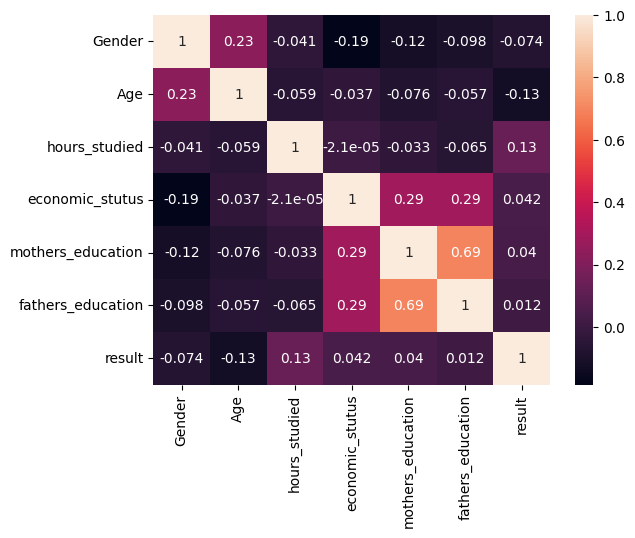

In [40]:
sns.heatmap(df.corr(), annot = True)

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Gather and preprocess the data (assuming X is the feature matrix and y is the target variable)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=85)

# Step 3: Create a linear regression model object
model = LinearRegression()

# Step 4: Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Step 6: Make predictions on new data
# new_data = np.array([[1.5, 2.0]])  # Example input for prediction
# predicted_value = model.predict(new_data)
# print("Predicted value:", predicted_value)


Mean Squared Error: 0.3192232662388704
Root Mean Squared Error: 0.5649984656960321
R-squared: -0.01157992780935535


In [42]:
new_data = np.array([[0, 26, 6, 2, 0, 0]])  # Example input for prediction
predicted_value = model.predict(new_data)
print("Predicted value:", predicted_value)

Predicted value: [3.62200138]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
df.head()

,Gender,Age,hours_studied,economic_stutus,mothers_education,fathers_education,result
0,1,22,4.0,2,1,2,4.00
1,1,22,3.0,0,0,2,3.50
2,1,22,4.5,1,0,0,2.75
3,1,22,4.0,2,3,3,3.50
4,1,22,4.5,2,3,3,2.25


In [44]:
X = df.iloc[:, :3]
y = df.iloc[:, -1]

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a linear regression model object
model = LinearRegression()

# Step 4: Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.25985208609125304
Root Mean Squared Error: 0.509756889204308
R-squared: 0.026033944282631616


In [50]:
new_data2 = np.array([[1, 33, 4]])  # Example input for prediction
predicted_value = model.predict(new_data2)
print("Predicted value:", predicted_value)

Predicted value: [3.2182292]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
new_data2

array([[ 1, 32,  4]])